# Health Survey Data Analysis

Scharmaine Chappell

## Executive Summary

For this analysis we are using state health departments survey responses collected for a yearly evaluation by the CDC. Here are are going to evaluate the data for any correlations between physical health (PHYSHLTH) and home ownership (RENTHOM1).

## The Data

Our data source is CDC Behavioral Risk Factor Surveillance System (BRFSS), https://www.cdc.gov/brfss/data_documentation/index.htm. It is a yearly telephone survey that is an accumulation of surveys taken by each state, Washington, DC and the US territories. Participants are questioned to evaluate possibly risky and preventative behaviors in regards to their own health factors. Each state completes at least 4,000 interview, per month, per year. Questions can be the same and or uniquely relevant to the specific year. Our data on hand is for the state of New York with over 10,000 records in our sample size.

#### PHYSHLTH responses are in response to a question of how many days in th the last 30 did they have any health concerns.

#### RENTHOM1 responses are in response to question of whether they rent or own their current residence


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

file_path = "https://raw.githubusercontent.com/learn-co-curriculum/da-phase3-project-enterprise/main/brfss_ny.csv"
df = pd.read_csv(file_path)

In [2]:
#VERIFYING THE NUMBER OF RESPONSES FOR EACH POSSIBLE ANSWER
#WE SEE THAT A MAJORITY OF OUR SAMPLE SET HAD A NO DAYS OF HEALTH CONCERNS IN THE LAST 30 DAYS(88)
df.PHYSHLTH.value_counts()


88.0    10565
30.0      768
2.0       597
1.0       410
5.0       367
3.0       361
77.0      248
10.0      231
7.0       209
15.0      194
4.0       163
20.0      147
14.0      144
99.0       81
25.0       55
6.0        47
8.0        45
21.0       26
28.0       22
12.0       22
9.0        11
29.0        8
13.0        7
18.0        6
17.0        6
16.0        6
24.0        5
27.0        5
11.0        4
26.0        3
23.0        3
19.0        2
22.0        1
Name: PHYSHLTH, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PHYSHLTH', ylabel='Density'>

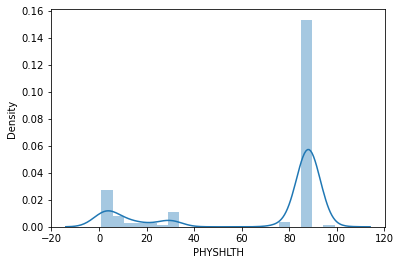

In [3]:
#VISUALIZING PHYSHLTH DATA BEFORE CLEAN UP
sns.distplot(df.PHYSHLTH)

In [4]:
df.PHYSHLTH.isna().sum()

0

In [5]:
df.RENTHOM1.value_counts()

1.0    8587
2.0    5370
3.0     608
9.0     147
7.0      57
Name: RENTHOM1, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RENTHOM1', ylabel='Density'>

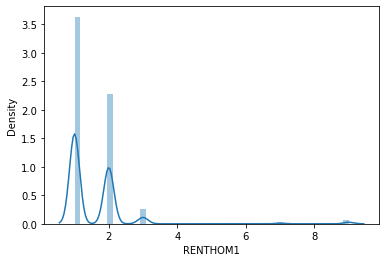

In [6]:
#VISUALIZING RENTHOM1 DATA BEFORE CLEAN UP
sns.distplot(df.RENTHOM1)


In [7]:
#CHECKING FOR ANY EMPTY OR NAN VALUES
df.RENTHOM1.isna().sum()

0

## Data Preparation

#### We must minimize the data to only the aspects we will be using for our current needs. We want to only include data that states the number of days of health issues. Therefore our range will only be for responses of 0 to 30. The only responses kept in regards to home ownership are whether they own or rent, 1 or 2.

#### See chart below for an explanation of responses possible for each catagory.

"PHYSHLTH
| 1 - 30 : Number of days       |
| 88     : None                 |
| 77     : Don't know/Not sure  |
| 99     : Refused              |
| BLANK  : Not asked or Missing |"

"RENTHOM1
| 1     : Own                  |
| 2     : Rent                 |
| 3     : Other arrangement    |
| 7     : Don't know/Not Sure  |
| 9     : Refused              |
| BLANK : Not asked or Missing |"

In [8]:
#CONVERT ALL PHYSHLTH ENTRIES OF 88(NONE) to 0
df.PHYSHLTH.replace(88.0,0,inplace = True)
df.PHYSHLTH

0         0.0
1        14.0
2         0.0
3         5.0
4         0.0
         ... 
14764     0.0
14765     0.0
14766     2.0
14767     0.0
14768     0.0
Name: PHYSHLTH, Length: 14769, dtype: float64

In [9]:
#DROP PHYSHLTH ENTRIES OF BLANK(NAN)
df.PHYSHLTH.dropna
df.PHYSHLTH

0         0.0
1        14.0
2         0.0
3         5.0
4         0.0
         ... 
14764     0.0
14765     0.0
14766     2.0
14767     0.0
14768     0.0
Name: PHYSHLTH, Length: 14769, dtype: float64

In [10]:
#UPDATE DATABASE WITH PHYSHLTH EXCLUDING 77 & 99 VALUES
df = df[df['PHYSHLTH'] <=30]
df['PHYSHLTH'].value_counts()

0.0     10565
30.0      768
2.0       597
1.0       410
5.0       367
3.0       361
10.0      231
7.0       209
15.0      194
4.0       163
20.0      147
14.0      144
25.0       55
6.0        47
8.0        45
21.0       26
28.0       22
12.0       22
9.0        11
29.0        8
13.0        7
18.0        6
17.0        6
16.0        6
24.0        5
27.0        5
11.0        4
26.0        3
23.0        3
19.0        2
22.0        1
Name: PHYSHLTH, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PHYSHLTH', ylabel='Density'>

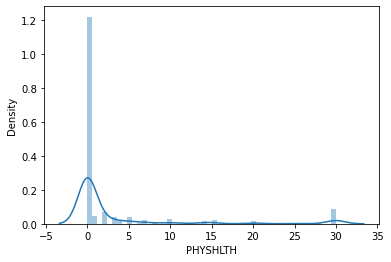

In [11]:
#VISUALIZING PHYSHLTH DATA AFTER CLEANING UP WHERE 88(NONE) IS REGISTERED AS 0
#AND ONLY ANSWERS 30 OR LESS ARE REPRESENTED
sns.distplot(df.PHYSHLTH)

In [12]:
df.RENTHOM1.value_counts()

1.0    8453
2.0    5206
3.0     585
9.0     141
7.0      55
Name: RENTHOM1, dtype: int64

In [13]:
#DROP RENTHOM1 ENTRIES OF BLANK(NAN)
df.RENTHOM1.dropna
df.RENTHOM1

0        2.0
1        1.0
2        2.0
3        3.0
4        2.0
        ... 
14764    2.0
14765    2.0
14766    2.0
14767    2.0
14768    3.0
Name: RENTHOM1, Length: 14440, dtype: float64

In [14]:
#UPDATE DATABASE WITH RENTHOM1 EXCLUDING VALUES OF 3, 7 & 9
df = df[df['RENTHOM1'] <= 2]
df['RENTHOM1'].value_counts()

1.0    8453
2.0    5206
Name: RENTHOM1, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RENTHOM1', ylabel='Density'>

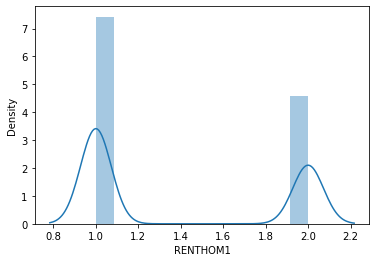

In [15]:
#VISUALIZING RENTHLTH DATA AFTER CLEANING UP REPRESENTING ONLY ANSWERS OF 1 OR 2
sns.distplot(df.RENTHOM1)

## Confidence Interval for Mean of `PHYSHLTH`
#### We will be calculating for a 95% confidence interval

In [16]:
#FINDING THE MEAN((x_bar) OF SAMPLE PHYSHLTH)
x_bar = df.PHYSHLTH.mean()
x_bar

3.064646020938575

In [17]:
#FINDING THE STANDARD DEVIATION OF SAMPLE PHYSHLTH
s = df.PHYSHLTH.std(ddof = 1)
s

7.581325164851767

In [18]:
#FINDING THE STANDARD ERROR OF
se = s/ np.sqrt(len(df.PHYSHLTH))
se

0.06486877124339503

In [19]:
#FINDING DEGREES OF FREEDOM OF PHYSHLTH
dof = len(df.PHYSHLTH) - 1
dof

13658

In [20]:
#FINDING THE T-CRITICAL VALUE
t_crit = stats.t.ppf((1-0.95)/2, dof)
t_crit

-1.960137690638995

In [21]:
#FINDOING THE MARGIN OF ERROR AND OUR RESULTING CONFIDENCE LEVEL
moe = t_crit * se
conf_int = (x_bar + moe), (x_bar - moe)
print("PHYSHLTH Confidence Interval:", conf_int)


PHYSHLTH Confidence Interval: (2.9374942974789575, 3.1917977443981926)


In [22]:
#CONFIRMING OUR RESULTS
confirm_ci = stats.t.interval(alpha = 0.95,                             
                 df= dof,            
                 loc = x_bar,                               
                 scale = se)
print("CONFIDENCE LEVEL CONFIRMATION:", confirm_ci)

CONFIDENCE LEVEL CONFIRMATION: (2.9374942974789575, 3.1917977443981926)


We are 95% confident that the mean PHYSHLTH of the population is between 2.937 and 3.191.

## Differences in `PHYSHLTH` Based on `RENTHOM1`

### How Does `PHYSHLTH` Differ Based on `RENTHOM1`?

#### Here we will create new databases. One will include only data where RENTHOM1 == 1(OWNS). A second where RENTHOM1 == 2(RENTS). Then we will compare the PHYSHLTH results of each of these two databases only.

In [23]:
#CREATING NEW DATABASE OF HOME OWNERS ONLY
df_own = df[df['RENTHOM1'] == 1.0 ]
df_own.RENTHOM1.value_counts()

1.0    8453
Name: RENTHOM1, dtype: int64

In [24]:
#CREATING NEW DATABASE OF RENTERS ONLY
df_rent = df[df['RENTHOM1'] == 2.0 ]
df_rent.RENTHOM1.value_counts()

2.0    5206
Name: RENTHOM1, dtype: int64

In [25]:
#CREATING NEW VARIABLES CONTAINING PHYSHLTH DATA SPECIFIC TO OWNERSHIP OR RENTING RESIDENCE
renters_hlth = df_rent.PHYSHLTH
owners_hlth = df_own.PHYSHLTH

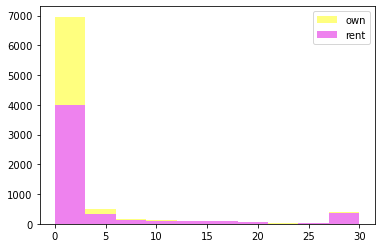

In [26]:
fig,ax = plt.subplots()

ax.hist(owners_hlth, label = 'own', alpha = 0.5, color = "yellow" )
ax.hist(renters_hlth, label = 'rent', color = "violet")


ax.legend()

We are seeing that those that home ownership health has less outliers in the higher ranges.

### Is the Difference Statistically Significant?

#### H_0 = There is no significant difference in health between those that own their home versus those that rent.

#### H_a = There is a significant difference in health between those that own their home versus those that rent.

#### We are evaluating two different variables, of different sample-sizes, with a 95% confidence interval, therefore I would use a two-tail test.

In [27]:
#USING A SIGNIFICANCE LEVEL = %5
alpha = 0.05

#FINDING THE MEAN OF OUR POPULATION (TOTAL DATABASE OF ENTIRE SURVEY)
mu = np.mean(df.PHYSHLTH)


#FINDING THE SAMPLE MEAN OF EACH DATASET

x_bar1 = np.mean(owners_hlth)
x_bar2 = np.mean(renters_hlth)

#FINDING THE DIFFERENCE BETWEEN THE SAMPLE AND POPULATION MEANS
diff_1 = x_bar1 - mu
diff_2 = x_bar2 - mu

#FINDING THE STANDARD DEVIATION OF EACH DATASET

s_1 = np.std(owners_hlth, ddof = 1)
s_2 = np.std(renters_hlth, ddof = 1)

#FINDING THE NUMBER OF OBESERVATIONS OF EACH DATASET

n_1 = len(owners_hlth)
n_2 = len(renters_hlth)

#FINDING THE DEGREES OF FREEDOM OF EACH DATASET
df_1 = n_1 - 1
df_2 = n_2 - 1

In [28]:
print (f""" The owners_hlth sample contains {n_1} observations, having a mean of {x_bar1}
and a standard deviation (sigma) of {round(s_1, 3)}, with {df_1} degrees of freedom.

The difference between the sample mean and the population mean is {round(diff_1, 2)}""" )

print (f""" The renters_hlth sample contains {n_2} observations, having a mean of {x_bar2}
and a standard deviation (sigma) of {round(s_2, 3)}, with {df_2} degrees of freedom.

The difference between the sample mean and the population mean is {round(diff_2, 2)}""")

 The owners_hlth sample contains 8453 observations, having a mean of 2.675854726132734
and a standard deviation (sigma) of 7.109, with 8452 degrees of freedom.

The difference between the sample mean and the population mean is -0.39
 The renters_hlth sample contains 5206 observations, having a mean of 3.6959277756434883
and a standard deviation (sigma) of 8.253, with 5205 degrees of freedom.

The difference between the sample mean and the population mean is 0.63


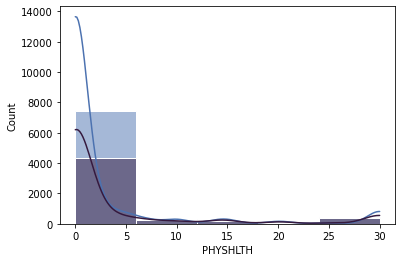

In [29]:
f, ax = plt.subplots()

sns.set(color_codes=True)
sns.histplot(owners_hlth, kde=True, bins=5)

sns.set(color_codes=True, palette = "rocket")
sns.histplot(renters_hlth, kde=True, bins=5);

In [30]:
#CALCULATING THE T-STATISTIC
t_1=(x_bar1 - mu)/(s_1/np.sqrt(n_1))
t_2=(x_bar2 - mu)/(s_2/np.sqrt(n_2))

print("owners_h_t_stat:", round(t_1, 3),
      "renters_h_t_stat:", round(t_2, 3))

owners_h_t_stat: -5.028 renters_h_t_stat: 5.519


In [31]:
#PREVIOUSLY CALCULATED PHYSHLTH T-CRITICAL
print("t_crit:", t_crit)

t_crit: -1.960137690638995


In [32]:
#CALCULATING P-VALUE
p = stats.norm.sf(x_bar)
print("Our p-value is:", round(p,3))

Our p-value is: 0.001


### With a p-value of 0.001, which is highly significant, we will be rejecting the null hypothis at confidence level of %5. 


## Next Steps

### With these findings, I would like to see how total income (INCOME2) and whether or not one has health care coverage (HLTHPLN1) effects physical health (PHYSHLTH). My null hypothisis would be that one or the other does not have an affect on PHYSHLTH. My alternate hypothisis is that one or the other has some level of significance on PHYSHLTH.